In [1]:
import pbjam as pb
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))


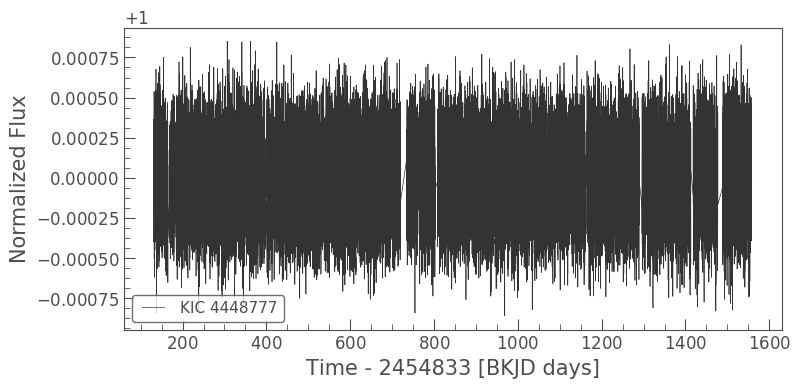

In [4]:
lc = lc.remove_outliers(4)
lc.plot()

In [5]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

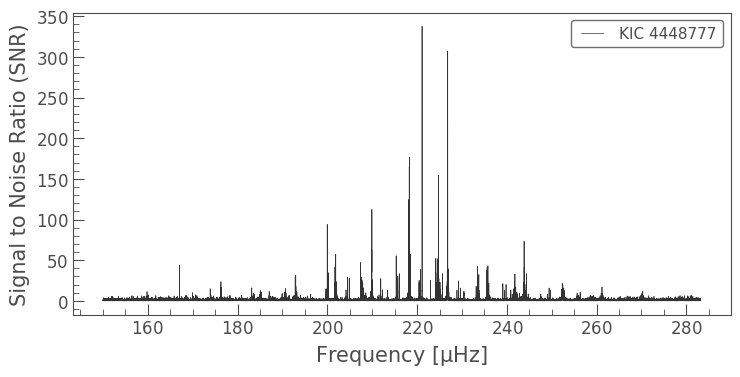

In [6]:
pg.plot()

In [7]:
ep = pb.epsilon()
result = ep(dnu=dnu, numax=numax, teff=teff, bp_rp=bp_rp, bw_fac=1.0)

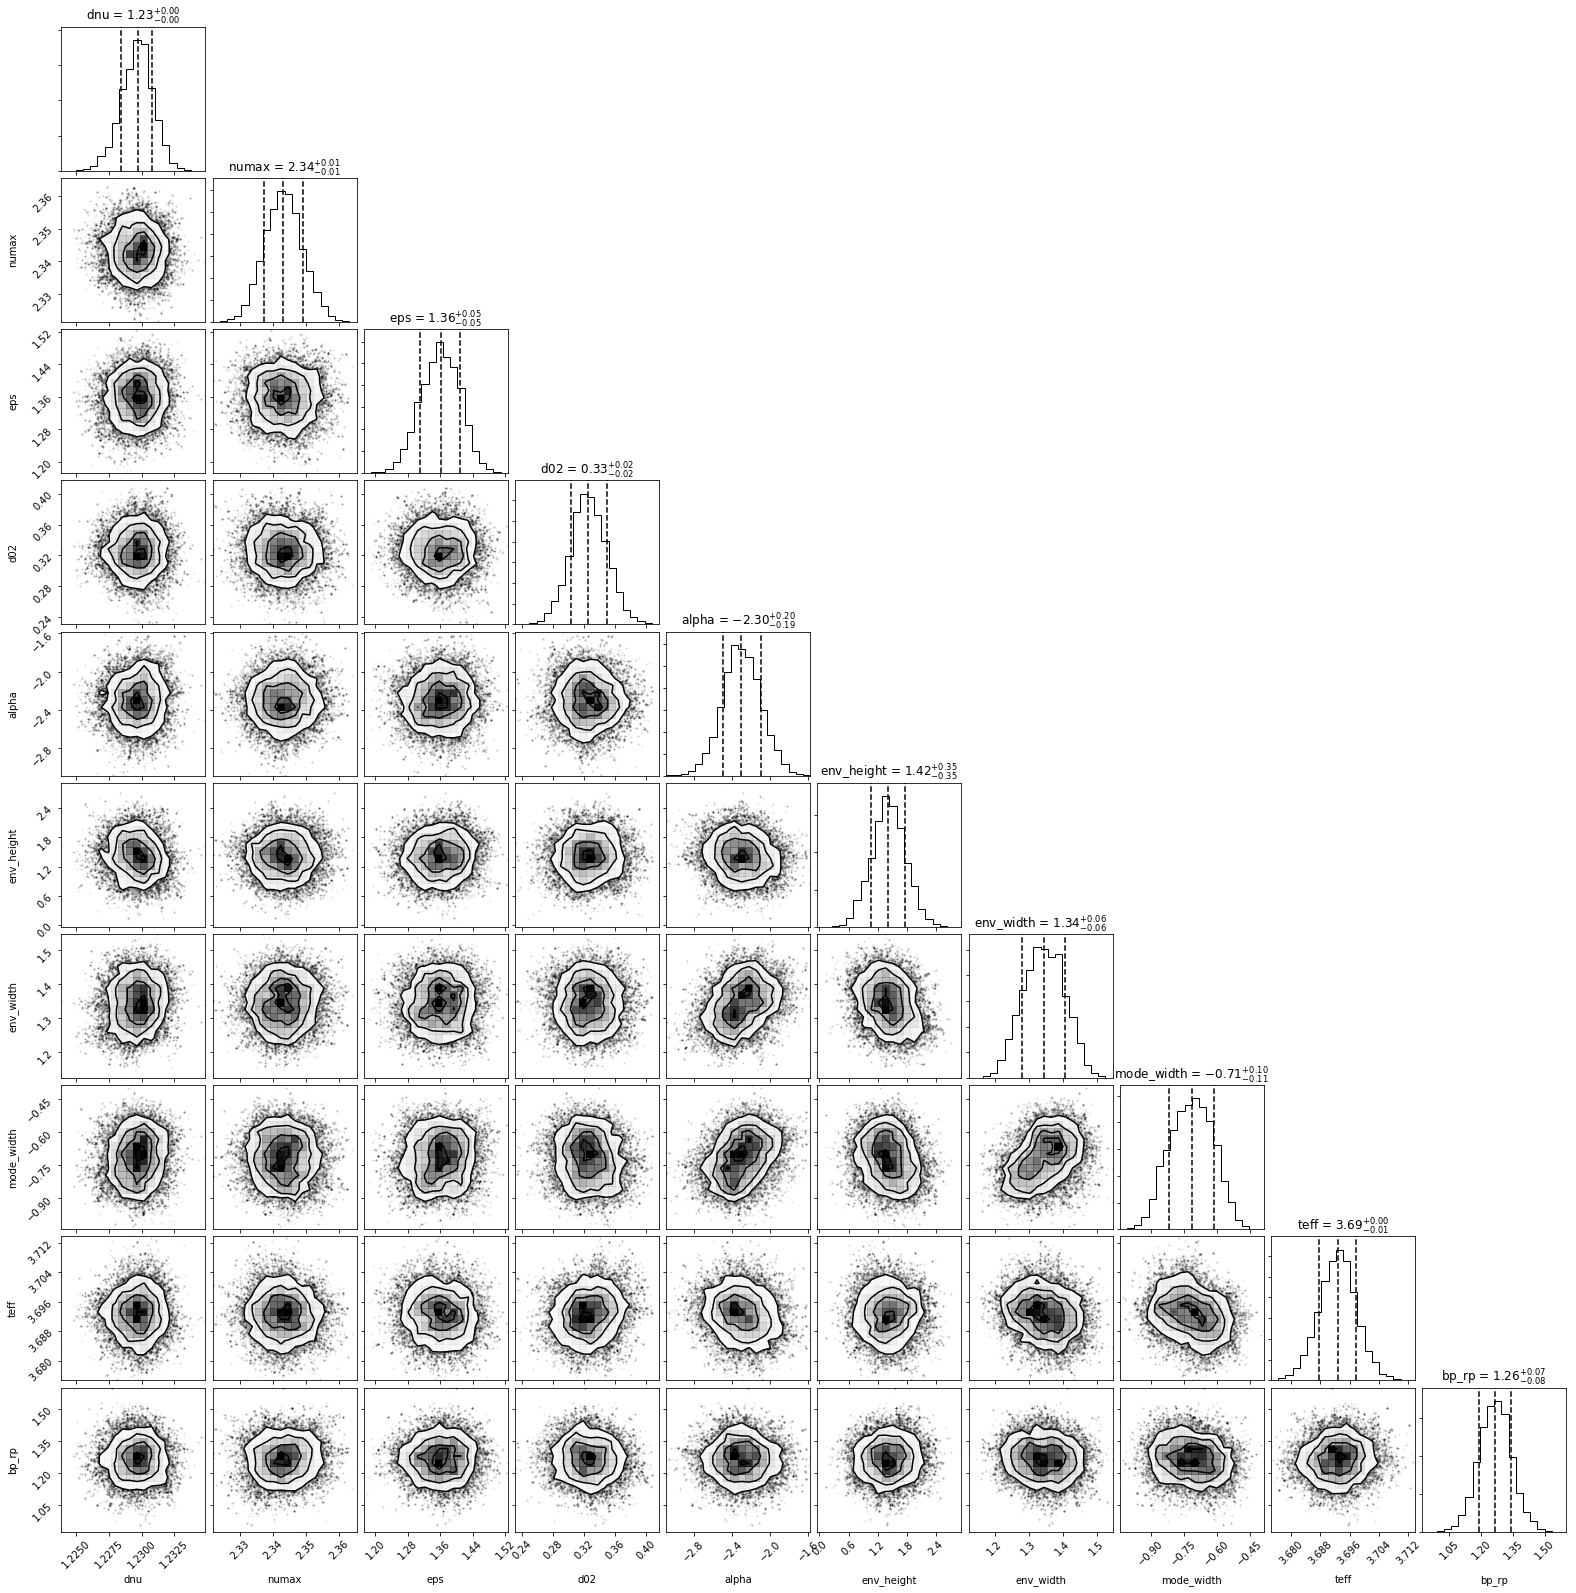

In [8]:
ep.plot_corner();

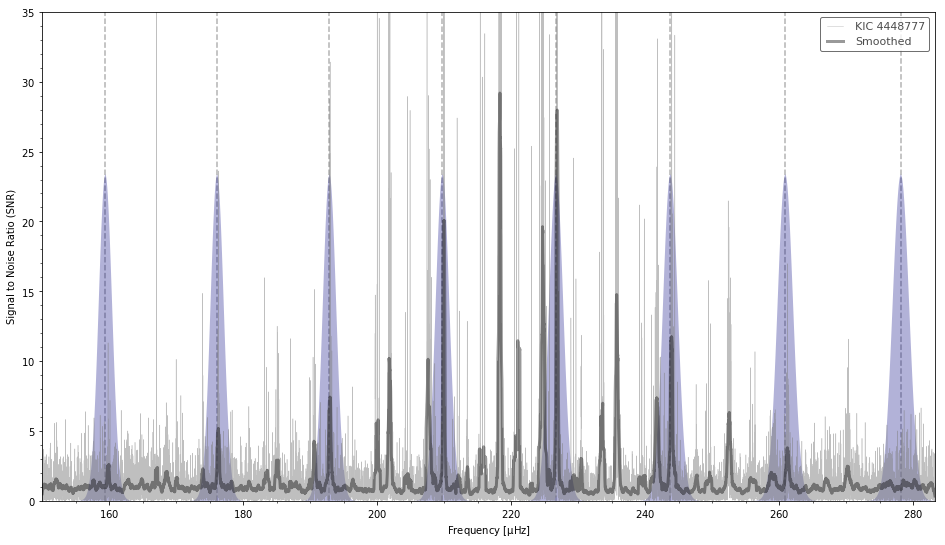

In [9]:
ep.plot(pg);

In [10]:
asy = pb.asy_peakbag.asymptotic_fit(pg.frequency.value, pg.power.value, 
                                    ep.samples, 
                                    teff, bp_rp, 
                                    nthreads=1, norders=7,
                                    store_chains=True)

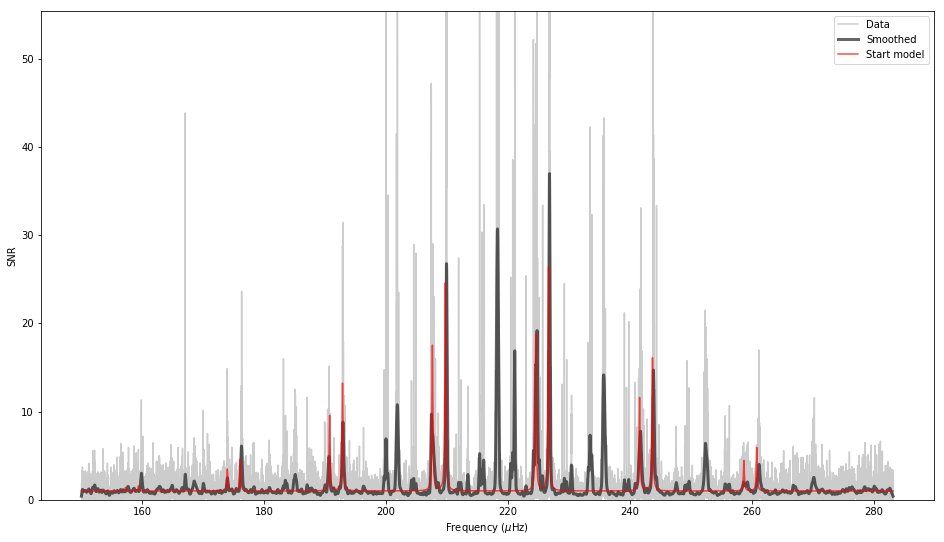

In [11]:
asy.plot_start();

In [12]:
asy_result = asy.run(burnin=1000, niter=1000)

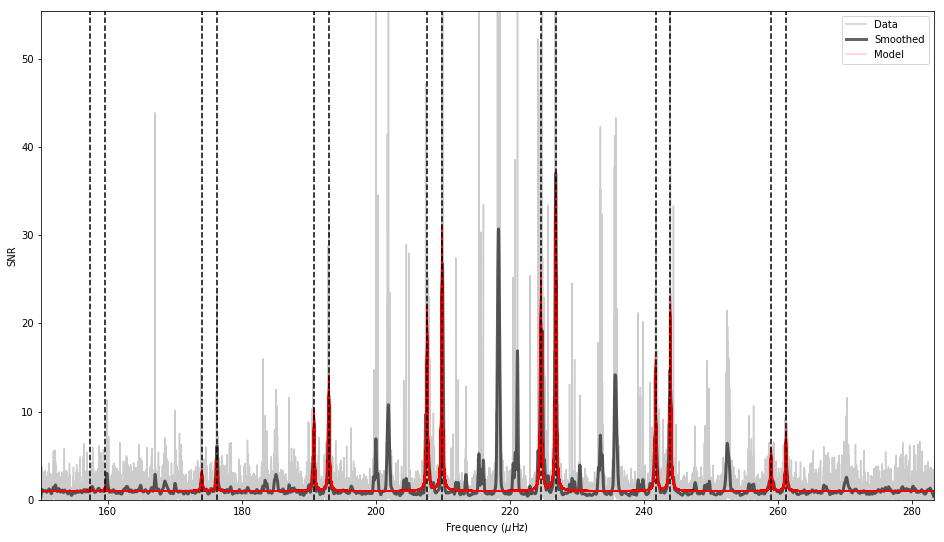

In [13]:
asy.plot();

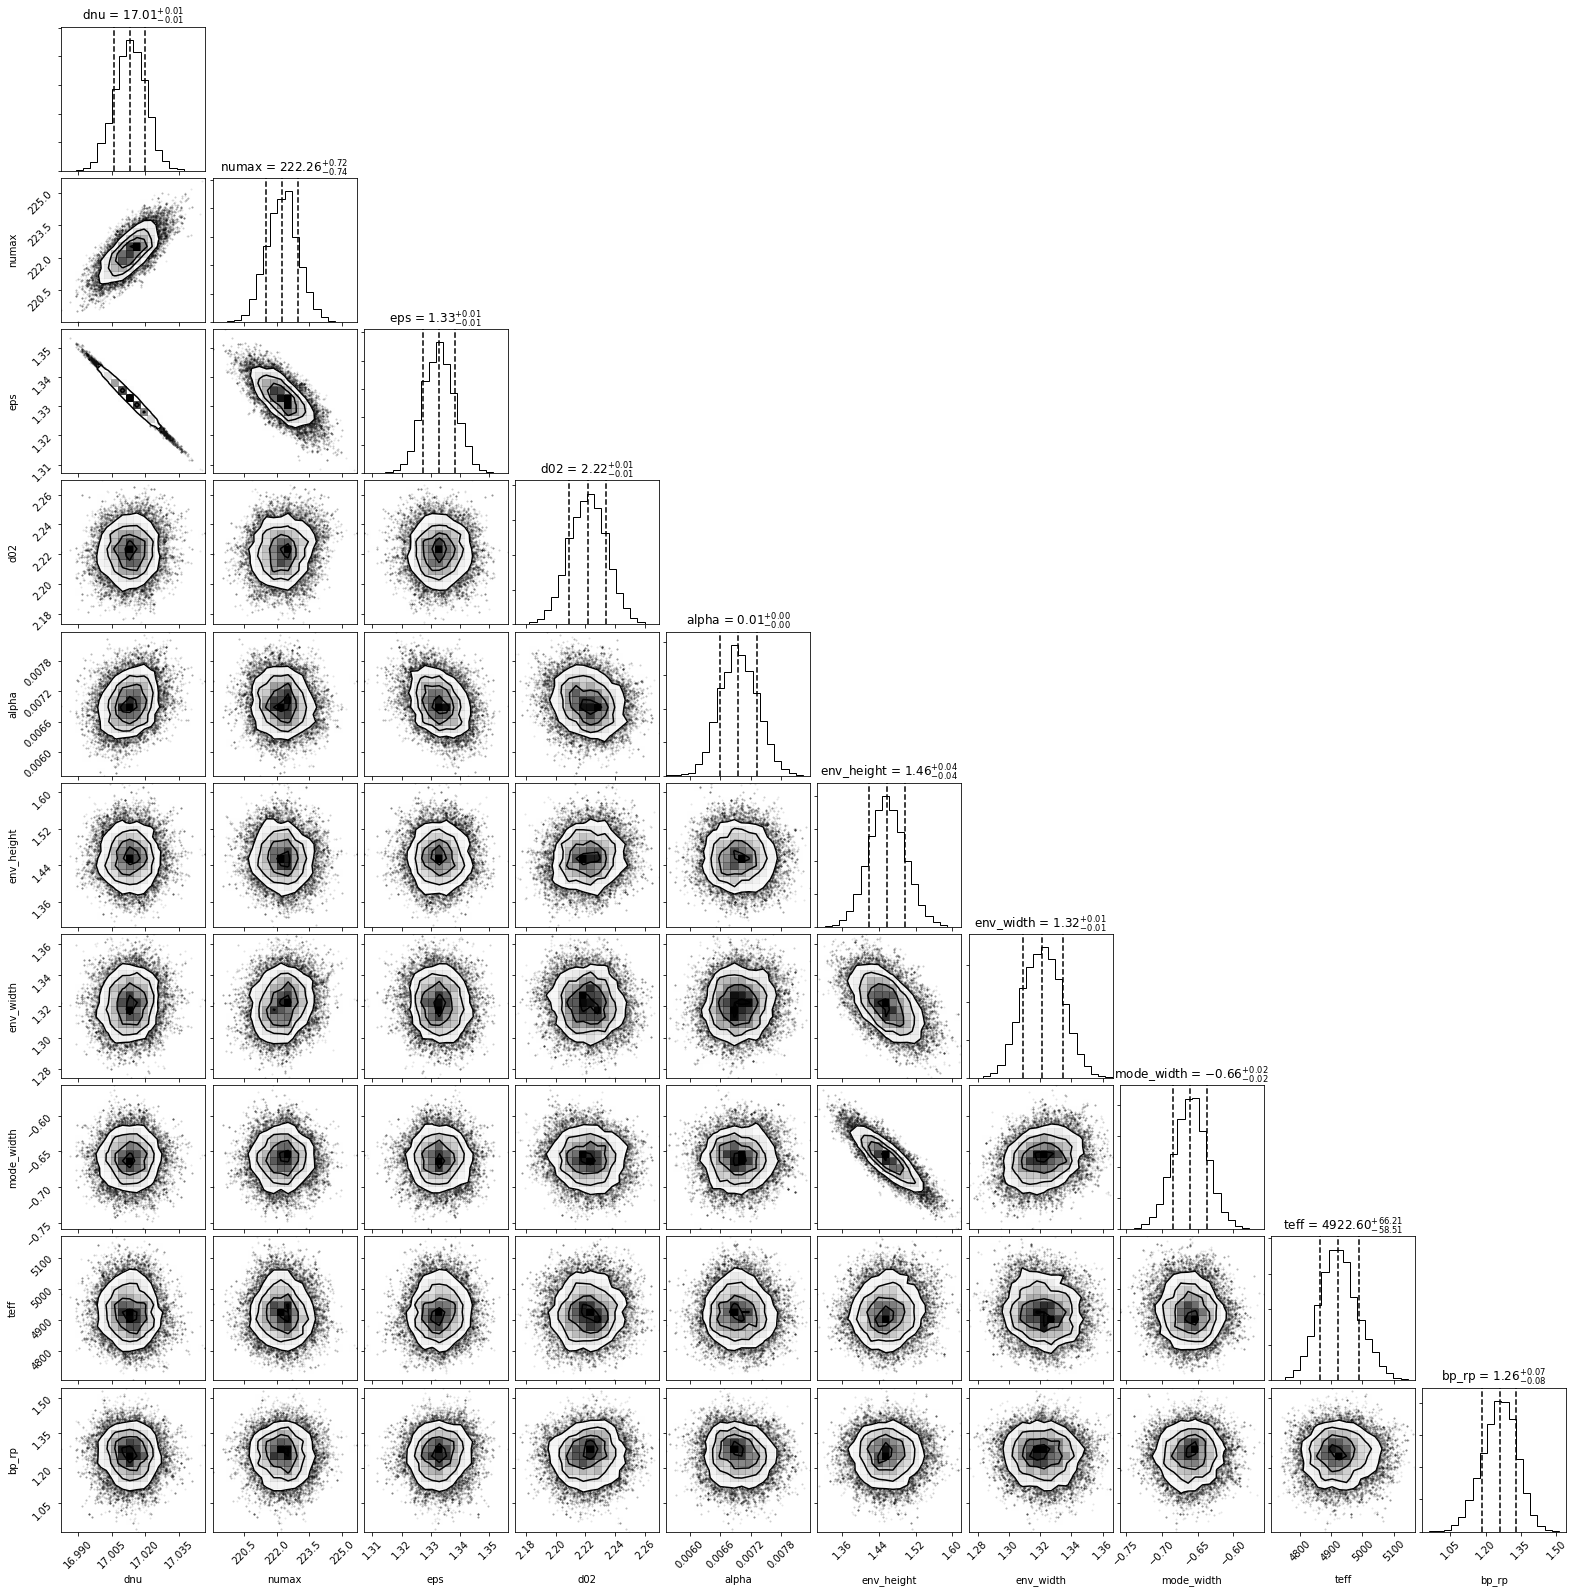

In [14]:
asy.plot_corner();

In [15]:
import pbjam
import importlib
importlib.reload(pbjam)
pbag = pbjam.peakbag(pg.frequency.value, pg.power.value, asy_result)

In [16]:
import pickle

edict = {'f': pg.frequency.value, 'p': pg.power.value, 'a': asy_result}

pickle_out = open("pb.pickle","wb")
pickle.dump(edict, pickle_out)
pickle_out.close()

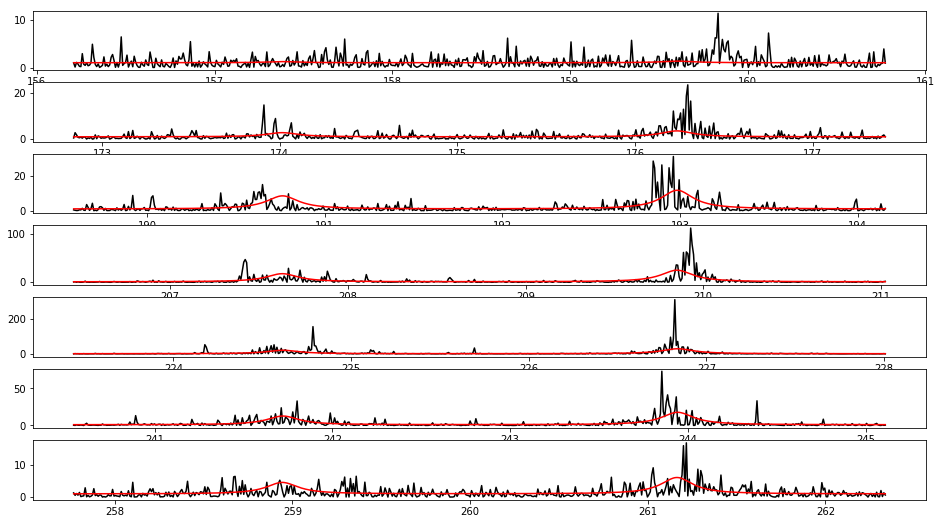

In [17]:
pbag.plot_start_model();

In [18]:
pbag.sample(model_type='simple', cores=4, tune=1500)

/home/grd/.local/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:34<00:00, 233.20draws/s]


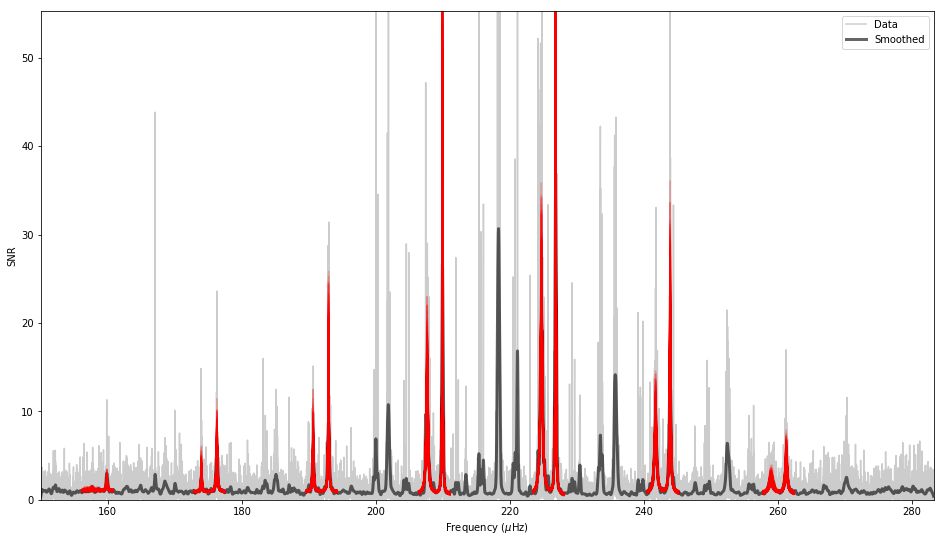

In [22]:
pbag.plot_flat_fit(thin=1);

In [21]:
pbag.sample(model_type='model_gp', cores=4, tune=1500)

/home/grd/Software/PBjam/pbjam/peakbag.py:289: UserWarning: This model is developmental - use carefully
  warnings.warn('This model is developmental - use carefully')
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
/home/grd/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/grd/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/grd/.loc

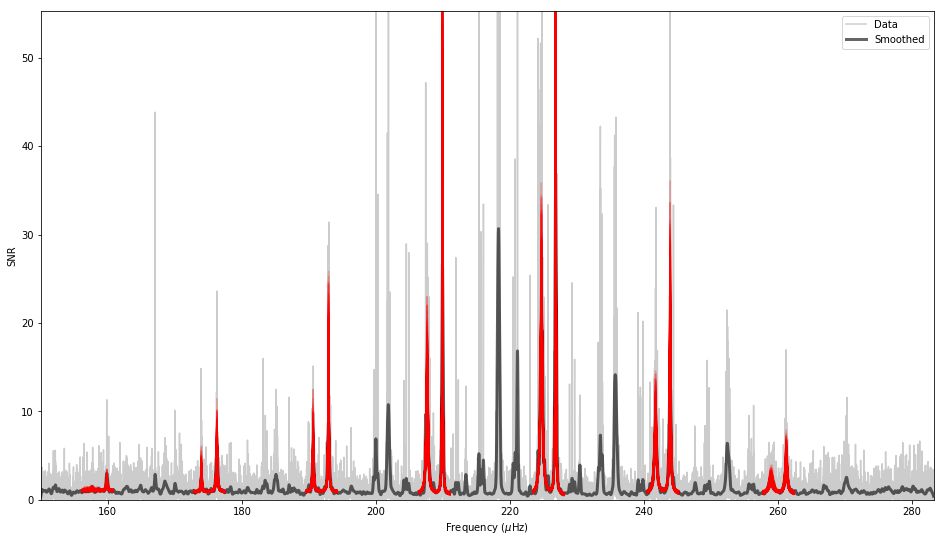

In [23]:
pbag.plot_flat_fit(thin=1);